In [67]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [68]:
# Load the  dataset.
customer_data = pd.read_excel("C:\\Users\\manis\\Downloads\\customer_churn_large_dataset.xlsx")

In [69]:
customer_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


Data Preprocessing

In [70]:
customer_data.shape

(100000, 9)

Here we have 100000 recordes and 9 columns.

In [71]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


Here Name,Gender and Location is categorical variable and remaining are Numerical variables.

Show summary of dataset. So that we can easily find the values of measure of central tendancy and measure of dispertion.

In [72]:
customer_data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [73]:
customer_data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [74]:
customer_data.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [75]:
# No Null values in this DataSet.
# Name column has not significant role here so that we will drop this column.

In [76]:
customer_data = customer_data.drop(['Name'],axis=1)
customer_data

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,Male,Los Angeles,17,73.36,236,0
1,2,62,Female,New York,1,48.76,172,0
2,3,24,Female,Los Angeles,5,85.47,460,0
3,4,36,Female,Miami,3,97.94,297,1
4,5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...
99995,99996,33,Male,Houston,23,55.13,226,1
99996,99997,62,Female,New York,19,61.65,351,0
99997,99998,64,Male,Chicago,17,96.11,251,1
99998,99999,51,Female,New York,20,49.25,434,1


# Find so relationship and ratio of categorical and numerical variables

In [77]:
customer_data['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

<AxesSubplot:>

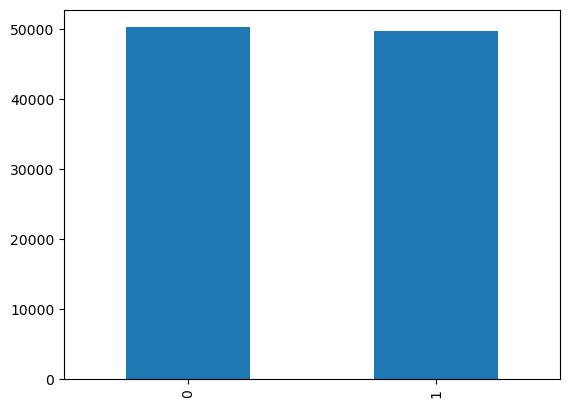

In [78]:
customer_data['Churn'].value_counts().plot.bar()

<AxesSubplot:>

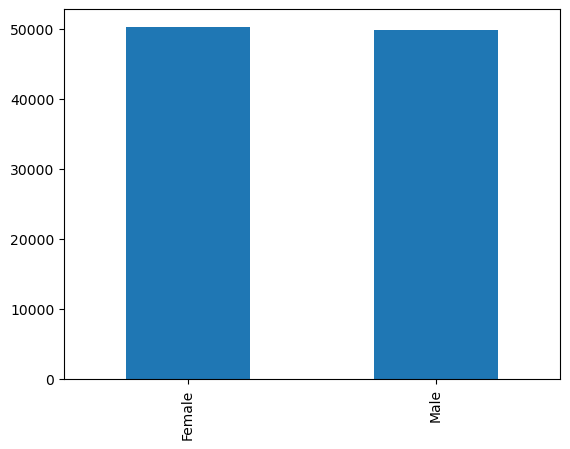

In [79]:
customer_data['Gender'].value_counts().plot.bar()

<AxesSubplot:>

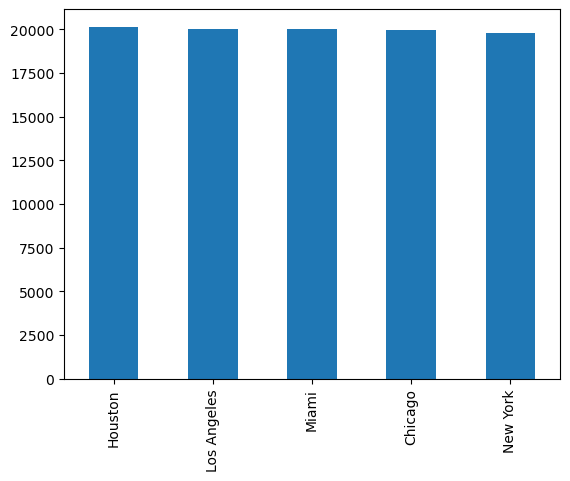

In [80]:
customer_data['Location'].value_counts().plot.bar()

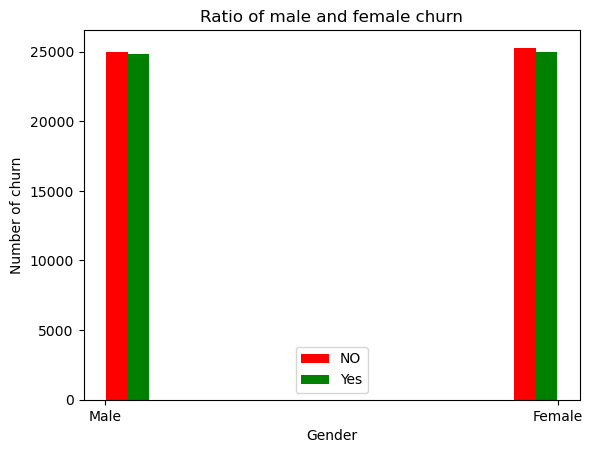

In [81]:
churn_No = customer_data[customer_data.Churn==0].Gender
churn_Yes= customer_data[customer_data.Churn==1].Gender
plt.xlabel('Gender')
plt.ylabel('Number of churn')
plt.title('Ratio of male and female churn')
plt.hist([churn_No,churn_Yes],color=['red','green'],rwidth=0.95,label=['NO','Yes'])
plt.legend()

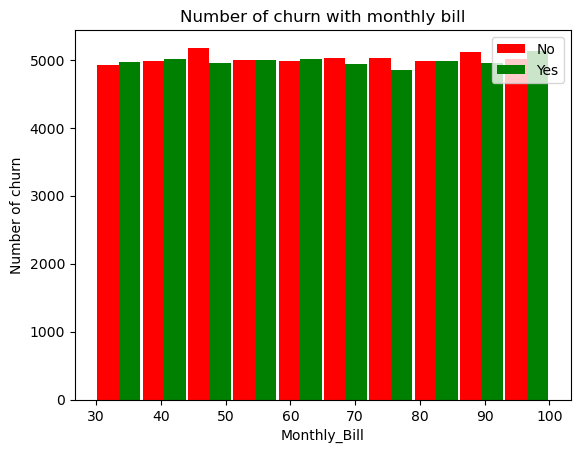

In [82]:
data_1 = customer_data[customer_data.Churn==0].Monthly_Bill
data_2 = customer_data[customer_data.Churn==1].Monthly_Bill
plt.xlabel('Monthly_Bill')
plt.ylabel('Number of churn')
plt.title('Number of churn with monthly bill')
plt.hist([data_1,data_2],color=['red','green'],rwidth=0.95,label=['No','Yes'])
plt.legend()

Distribution of numerical variables

<AxesSubplot:xlabel='Age', ylabel='Count'>

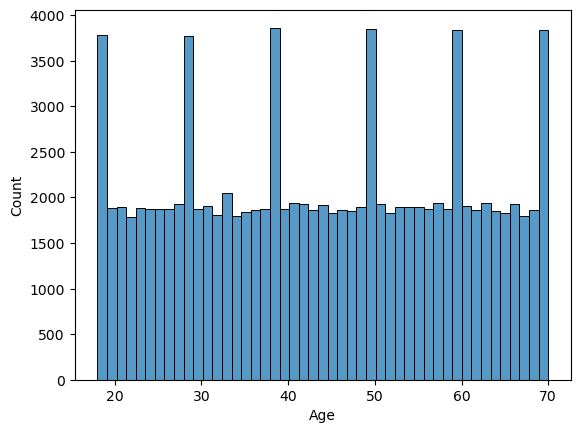

In [83]:
sns.histplot(customer_data.Age)

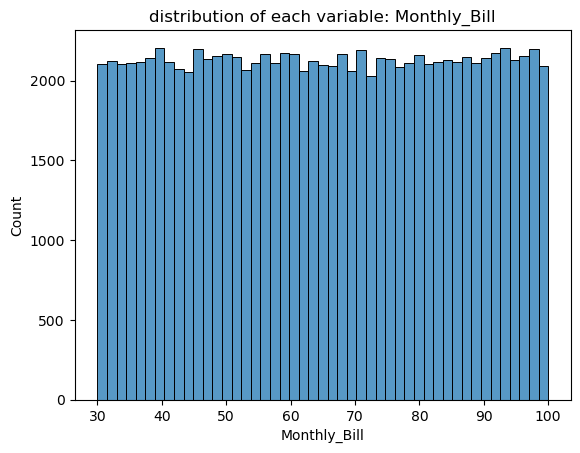

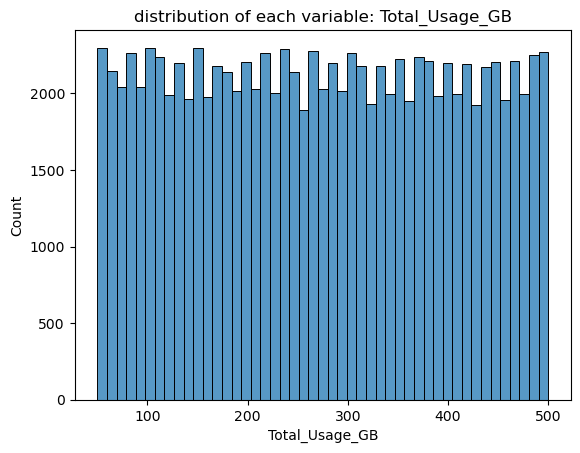

In [84]:
for dist in customer_data.columns[5:7]:
    sns.histplot(customer_data[dist])
    plt.title('distribution of each variable: '+dist)
    plt.show()

# Checking for outliers on the Basis of Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba818d36a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba818d3c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba818d34f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba818dd220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba818dd4f0>],
 'means': []}

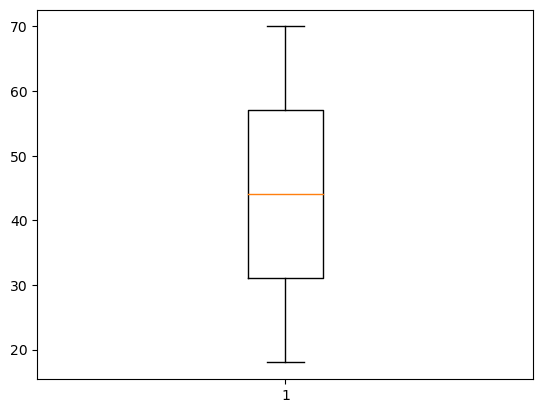

In [85]:
plt.boxplot(customer_data.Age)

In Age column we do not have outliers

Similarly checking for other variables.

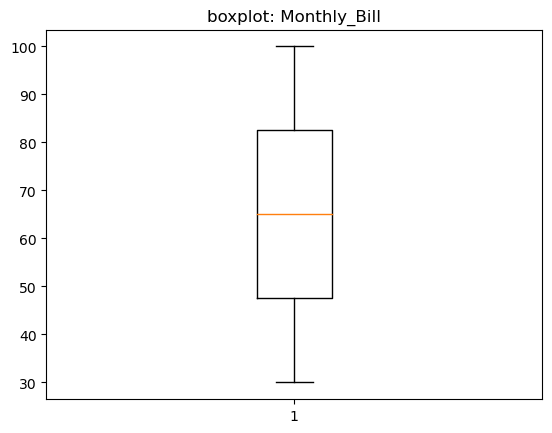

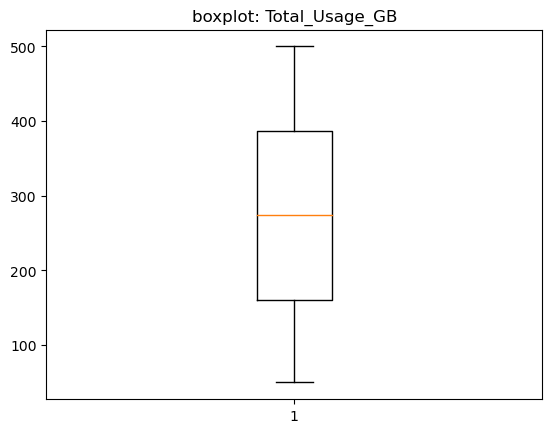

In [86]:
for outlier in customer_data.columns[5:7]:
    plt.boxplot(customer_data[outlier])
    plt.title('boxplot: '+outlier)
    plt.show()

No columns has outliers persent.

# Feature Engineering

In [87]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(customer_data.drop(['Churn'],axis=1), customer_data['Churn'],test_size=0.3)

For Generating  relevant features from the dataset that can help improve the model's prediction accuracy and for encoding the categorical variable. I use here columntransformer and one hot encoding

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [89]:
transformar = ColumnTransformer(transformers=[('tr1', OneHotEncoder(sparse=False,drop='first'),['Gender','Location'])],remainder='passthrough')

In [90]:
transformar.fit(x_train)
x_train_1 = transformar.transform(x_train)
x_test_1 = transformar.transform(x_test)

scaling or normalization the train and test datasets

In [91]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [92]:
std.fit(x_train_1)
x_train_std = std.transform(x_train_1)
x_test_std = std.transform(x_test_1)

In [93]:
x_train_std.shape ,x_test_std.shape,  y_train.shape,y_test.shape 

((70000, 10), (30000, 10), (70000,), (30000,))

# Model Building

LogisticRegression

In [94]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [95]:
log_reg.fit(x_train_std,y_train)

LogisticRegression()

In [96]:
# predicting the test data
predict = log_reg.predict(x_test_std)

# Evaluating the model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score)

In [97]:
from sklearn import metrics

In [98]:
print(metrics.accuracy_score(y_test,predict))
print(metrics.confusion_matrix(y_test,predict))
print(metrics.classification_report(y_test,predict))

0.4988
[[9317 5734]
 [9302 5647]]
              precision    recall  f1-score   support

           0       0.50      0.62      0.55     15051
           1       0.50      0.38      0.43     14949

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



# RandomForest 

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rand_for = RandomForestClassifier()
rand_for.fit(x_train_std,y_train)

RandomForestClassifier()

In [101]:
pred_random = rand_for.predict(x_test_std)

In [102]:
print(metrics.accuracy_score(y_test,pred_random))
print(metrics.confusion_matrix(y_test,pred_random))
print(metrics.classification_report(y_test,pred_random))

0.4984
[[8000 7051]
 [7997 6952]]
              precision    recall  f1-score   support

           0       0.50      0.53      0.52     15051
           1       0.50      0.47      0.48     14949

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



The logistic model demonstrates superior accuracy when compared to the other model.

# cross-validation and hyperparameter tuning

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
print('Acuuracy score for logistic model:',cross_val_score(LogisticRegression(),x_train_std,y_train,cv=20, scoring='accuracy'))

Acuuracy score for logistic model: [0.49914286 0.50457143 0.504      0.50514286 0.51571429 0.50485714
 0.50971429 0.50228571 0.51714286 0.49028571 0.51714286 0.49371429
 0.50142857 0.49685714 0.49914286 0.498      0.50085714 0.50542857
 0.49114286 0.51342857]


In [105]:
print('Acuuracy score for RandomForest model:',cross_val_score(RandomForestClassifier(),x_train_std,y_train,cv=10, scoring='accuracy'))

Acuuracy score for RandomForest model: [0.50314286 0.49242857 0.49671429 0.50128571 0.50871429 0.50271429
 0.48785714 0.49557143 0.50071429 0.49928571]


The logistic model demonstrates superior accuracy when compared to the RandomForest model

In [106]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [107]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(x_train_std, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.502329,{'n_estimators': 10}
1,logistic_regression,0.503314,{'C': 1}


Here we clear see this if we use 'n_estimators' as 10 the random forest give better result

# New DataSet

In [108]:
data = pd.read_excel("C:\\Users\\manis\\OneDrive\\Documents\\Customer_data.xlsx")

In [109]:
data_1 = np.array(data)
data_1[0:10].reshape(1,-1)

array([[332,  73, 184, 369, 308, 446, 321,  83, 371, 114]], dtype=int64)

In [110]:
##transformation of new data 
std.transform(data_1[0:10].reshape(1,-1))

array([[663.02455106, 181.89701282, 458.93385158, 921.08707079,
        771.36900581,  -1.72075609,  18.13460634,  10.17992626,
         15.11227488,  -1.2314826 ]])

In [111]:
## Predicting on the basis of logisticregression
log_reg.predict(data_1[0:10].reshape(1,-1))

array([1], dtype=int64)

# Pickling the Model file for Deployment

In [112]:
import pickle

In [113]:
pickle.dump(log_reg,open('LogisticRegression.pkl','wb'))

In [114]:
pickled_model = pickle.load(open('LogisticRegression.pkl','rb'))

In [115]:
pickled_model.predict(data_1[0:10].reshape(1,-1))

array([1], dtype=int64)